In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

os.chdir('/content/drive/MyDrive/PR_202210835/Lab09')

In [3]:
# 필요한 라이브러리 설치
!pip install mtcnn tensorflow keras_facenet

# 라이브러리 로드
from mtcnn import MTCNN
from keras_facenet import FaceNet

# MTCNN 초기화
detector = MTCNN()

# FaceNet 초기화
embedder = FaceNet()

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.6 MB/s eta 0:00:00
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=0ff931f91f79385d7112a2244574b37da8a0b603d5fd9dd836208439c1db7555
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras_facenet


In [5]:
# 얼굴 검출 함수
def detect_faces(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"이미지를 로드할 수 없습니다: {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    '''
    얼굴 검출 부분 추가
    '''
    faces = detector.detect_faces(img_rgb)
    if len(faces) == 0:
        raise ValueError(f"얼굴을 검출하지 못했습니다: {image_path}")
    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(img_rgb, (x, y), (x + width, y + height), (255, 0, 0), 2)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()
    return img_rgb, faces

# 얼굴 임베딩 생성 함수
def get_face_embedding(image, face):
    x, y, width, height = face['box']
    # 얼굴 영역이 이미지 범위를 넘어서는 경우 처리
    x, y = max(0, x), max(0, y)
    '''
    얼굴 box 영역 기반으로 crop 부분 추가
    '''
    face_img = image[y:y+height, x:x+width]

    plt.imshow(face_img)
    plt.axis("off")
    plt.show()
    if face_img.size == 0:
        raise ValueError("유효한 얼굴 영역을 가져오지 못했습니다.")
    face_img = cv2.resize(face_img, (160, 160))
    face_img = np.expand_dims(face_img, axis=0)
    '''
    임베딩 벡터 검출 부분 추가
    '''
    embedding = embedder.embeddings(face_img)[0]

    return embedding

# 두 얼굴 간의 유사도 계산 함수
def cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))



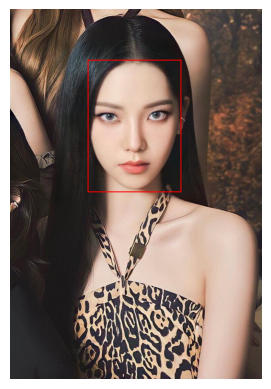

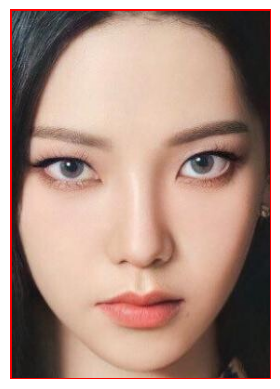

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


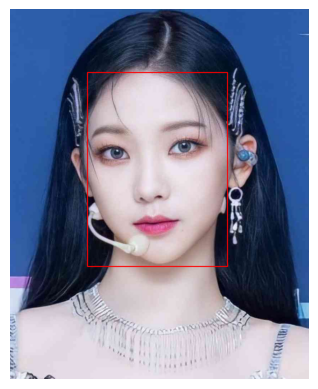

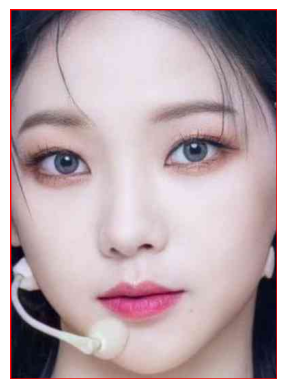

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Cosine Similarity: 0.81
같은 사람일 가능성이 높습니다!


In [6]:
# 테스트 이미지 경로
image1_path = "images/face_recognition/karina1.jpg"  # 얼굴 이미지 1
image2_path = "images/face_recognition/karina2.jpg"  # 얼굴 이미지 2

# 이미지 1: 얼굴 검출 및 임베딩 생성
image1, faces1 = detect_faces(image1_path)
embedding1 = get_face_embedding(image1, faces1[0])

# 이미지 2: 얼굴 검출 및 임베딩 생성
image2, faces2 = detect_faces(image2_path)
embedding2 = get_face_embedding(image2, faces2[0])

# 두 얼굴 비교
similarity = cosine_similarity(embedding1, embedding2)
print(f"Cosine Similarity: {similarity:.2f}")

if similarity > 0.5:  # 유사도 기준값 (0.5는 예시, 조정 가능)
    print("같은 사람일 가능성이 높습니다!")
else:
    print("다른 사람일 가능성이 높습니다!")

In [7]:
!jupyter nbconvert --to html FaceNet.ipynb

[NbConvertApp] Converting notebook FaceNet.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 971351 bytes to FaceNet.html


In [9]:
os.chdir('/content/drive/MyDrive/PR_202210835')

In [17]:
!pip install jupytext
!jupytext --to notebook Lab09/utils.py

[jupytext] Reading Lab09/utils.py in format py
[jupytext] Writing Lab09/utils.ipynb


In [18]:
!jupyter nbconvert --to html Lab09/utils.ipynb

[NbConvertApp] Converting notebook Lab09/utils.ipynb to html
[NbConvertApp] Writing 288422 bytes to Lab09/utils.html
